In [41]:
import os
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.image  import imread
from sklearn.datasets import make_classification,make_blobs
from sklearn.metrics  import *
from sklearn.model_selection import train_test_split
from sklearn.cluster  import KMeans,MiniBatchKMeans
from sklearn.metrics  import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [42]:
X, y = make_blobs(n_samples=1000,n_features=2,centers=5,random_state=50,cluster_std=0.9)

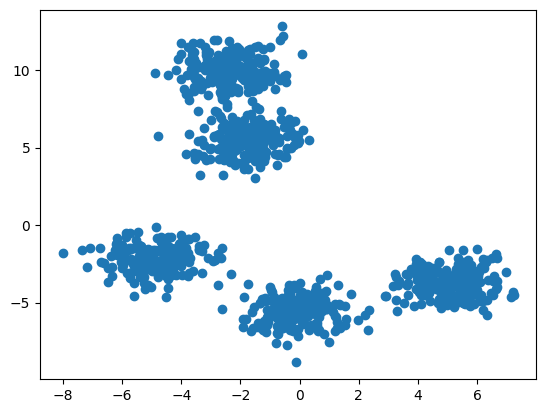

In [43]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [44]:
kmeans = KMeans(n_clusters=5)
pred = kmeans.fit_predict(X)

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [45]:
kmeans.inertia_

1621.6308242896907

In [46]:
Centroids = kmeans.cluster_centers_

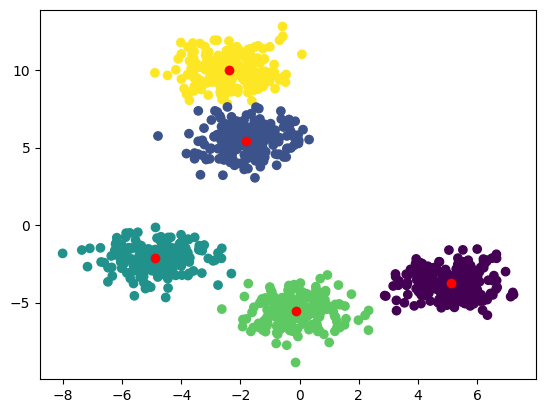

In [47]:
plt.scatter(X[:,0],X[:,1],c=pred,cmap='viridis')
plt.scatter(Centroids[:,0],Centroids[:,1],c='red',label='Centroids')
plt.show()

In [48]:
Centroids

array([[ 5.12073089, -3.72771509],
       [-1.80298882,  5.43885042],
       [-4.88107136, -2.12674407],
       [-0.12006357, -5.53197257],
       [-2.39919045,  9.99805925]])

In [49]:
test = np.array([[-0.1,-4]])
kmeans.predict(test)

array([3], dtype=int32)

In [50]:
kmeans.transform(test)

array([[ 5.22782652,  9.59124957,  5.13495191,  1.53210395, 14.1856244 ]])

In [51]:
kmeans.inertia_

1621.6308242896907

&nbsp;

In [52]:
minibatch = MiniBatchKMeans(n_clusters=5)
pred = minibatch.fit_predict(X)

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


In [53]:
minibatch.cluster_centers_

array([[-2.42119379,  9.99929021],
       [-0.12168184, -5.55055247],
       [ 5.11198413, -3.74489767],
       [-4.89534413, -2.10020566],
       [-1.7953843 ,  5.41561524]])

In [54]:
silhouette_score(X,kmeans.labels_)

0.6828529775526213

In [55]:
kmeans = KMeans(n_clusters=6)
pred = kmeans.fit_predict(X)

Centroids = kmeans.cluster_centers_

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


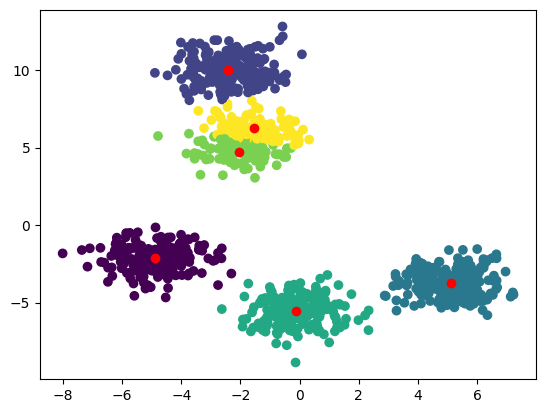

In [56]:
plt.scatter(X[:,0],X[:,1],c=pred,cmap='viridis')
plt.scatter(Centroids[:,0],Centroids[:,1],c='red',label='Centroids')
plt.show()

In [57]:
kmeans.inertia_

1490.4247088528944

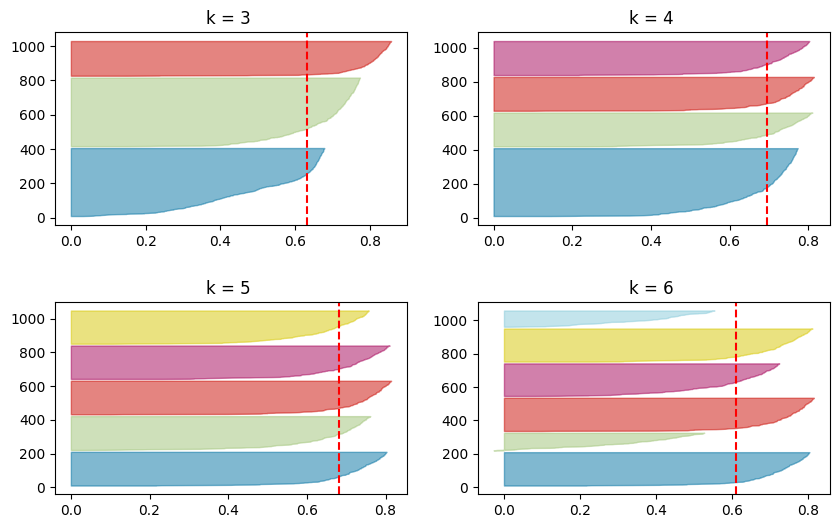

In [58]:
plt.figure(figsize=(10,6)).subplots_adjust(hspace=0.4)
for enum,i in enumerate(range(3,7)):
    plt.subplot(2,2,enum+1)
    plt.title(f'k = {i} ')
    visualizer = SilhouetteVisualizer(KMeans(n_clusters=i,n_init=10), colors='yellowbrick') 
    visualizer.fit(X)        # Fit the data to the visualizer
plt.show()

> ideal k = 5

In [59]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline  import Pipeline

In [60]:
X,y = load_digits(return_X_y=True)
X.shape

(1797, 64)

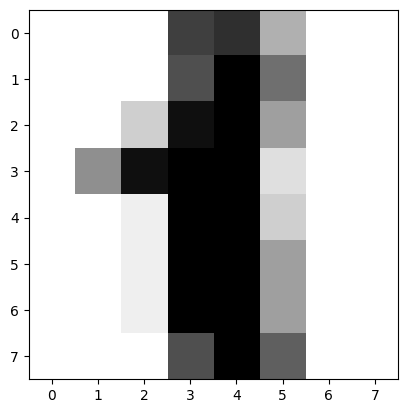

In [61]:
plt.style.use('default')
plt.imshow(X[1,:].reshape(8,8),cmap='binary')
plt.show()

In [62]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [63]:
log = LogisticRegression(multi_class='multinomial')
log.fit(xtrain,ytrain)

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [64]:
pred = log.predict(xtest)
print(classification_report(ytest,pred))
print('accuracy_score :' ,log.score(xtest,ytest))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

accuracy_score : 0.9694444444444444


In [65]:
kmeans = KMeans(n_clusters=50)


In [66]:
pipeline = Pipeline(
    steps=[
        ('kmeans',KMeans(n_clusters=50)),
        ('LogisticRegression',LogisticRegression()),
        ]
    )
pipeline.fit(xtrain,ytrain)
pred = pipeline.predict(xtest)

/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/home/mateus/Documentos/pythonVirtual/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.datasets import fetch_olivetti_faces

In [68]:
print(classification_report(ytest,pred))
print('accuracy_score :' ,pipeline.score(xtest,ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       1.00      0.96      0.98        28
           2       0.92      1.00      0.96        33
           3       0.97      0.97      0.97        34
           4       1.00      1.00      1.00        46
           5       0.90      0.94      0.92        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.95      0.93      0.94        40

    accuracy                           0.96       360
   macro avg       0.97      0.96      0.97       360
weighted avg       0.96      0.96      0.96       360

accuracy_score : 0.9638888888888889


In [69]:
x = fetch_olivetti_faces()

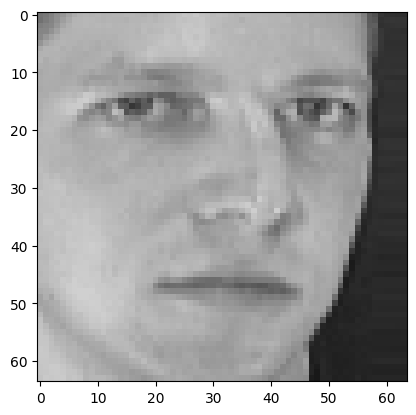

In [71]:
import cv2
color = cv2.cvtColor(x['images'][1,:],cv2.COLOR_GRAY2RGB)
plt.imshow(color)
plt.show()